In [7]:
import numpy as np
import math
from matplotlib import pyplot as plt

class Normalizer:
    """
    The Great Normalizer
    """
    mins: np.ndarray
    maxs: np.ndarray
    span: np.ndarray
    mids: np.ndarray

    def __init__(self, reference_inputs: np.ndarray):
        self.mins = np.min(reference_inputs, 0)
        self.maxs = np.max(reference_inputs, 0)
        self.span = self.maxs - self.mins
        # mids = span / 2 + mins
        # and thus:
        # mids = (maxs + mins) / 2
        self.mids = (self.maxs + self.mins) / 2

    def scale(self, set: np.ndarray):
        # k0 = (reference_inputs[0] - mids) / (span / 2)
        # and thus:
        # k0 = 2*(reference_inputs[0] - mids) / span
        return 2 * np.subtract(set, self.mids) / self.span

dataset = np.array([
    [2104, 5, 1, 45, 460],
    [1416, 3, 2, 40, 232],
    [1534, 3, 2, 30, 315],
    [1600, 4, 2, 30, 389],
    [852, 2, 1, 36, 178],
])
# inputs = dataset[:, :-1]
raw_inputs = dataset[:, :-1]
inputs = Normalizer(raw_inputs).scale(raw_inputs)
outputs = dataset[:, -1]

w = [0.25, 6.7, -1.5, -2.14]
b = 2
alpha = 1


def price(x):
    """
    input:
        `N`[1...inf) input rows
    return:
        `1D` arr of `N` predictions
    """
    return np.dot(w, x.T) + b # w is applied to N[1...inf) rows of x. Result: 1D arr of N predictions

def prices():
    return price(inputs)

def cost():
    return np.mean((prices() - outputs) ** 2) / 2


def gradients():
    err = prices() - outputs
    gw = np.dot(err, inputs) / len(err)
    gb = np.mean(err)
    return gw, gb


print(cost())
print(gradients())
print(prices())


53824.043284253145
(array([-70.08767509, -43.1359699 , -60.08166816,  41.00123428]), -313.1664681576145)
[ 8.31       -2.47142705  0.42903088  4.92205538 -3.022     ]


In [8]:
pre_cost = cost()
delta = []
divergences = 0
for i in range(10000):
  gw,gb = gradients()
  # print((gw,gb))
  w -= alpha*gw
  b -= alpha*gb
  new_cost = cost()
  delta.append(pre_cost - new_cost)
  if new_cost > pre_cost:
    divergences += 1
    if divergences > 3:
      print("WARNING: COST INCREASED 3 TIMES IN A ROW. BREAKING THE TRAINING SESSION...")
      break
  else:
    divergences = 0

  pre_cost = new_cost
  if i % 1000 == 0 or i == 9999:
      print(f"Iteration {i:4}: Cost {cost():0.2e} ",
            # f"dj_dw: {gw}, dj_db: {gb: 0.3e}  ",
            f"delta: {delta[-1]:0.5e}",
            f"w: {w}, b:{b: 0.5e}")
  if delta[-1] == 0:
    break
print(cost())
print(gradients())
print(prices())




Iteration    0: Cost 3.96e+03  delta: 4.98636e+04 w: [ 70.33767509  49.8359699   58.58166816 -43.14123428], b: 3.15166e+02
Iteration 1000: Cost 2.01e-12  delta: 5.73746e-14 w: [ 72.67903332  99.50602223 -25.04904487 -51.97509171], b: 3.14741e+02
Iteration 2000: Cost 1.12e-24  delta: 2.92421e-26 w: [ 72.67902086  99.50603344 -25.04904327 -51.9750905 ], b: 3.14741e+02
6.766078916742344e-25
(array([ 1.02136546e-13, -9.09494702e-14, -2.27373675e-14,  0.00000000e+00]), 0.0)
[460. 232. 315. 389. 178.]


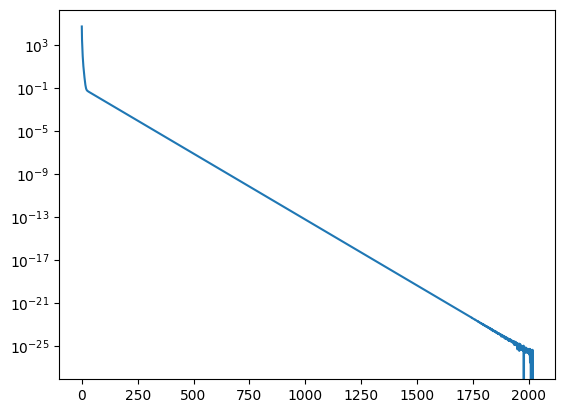

In [9]:

plt.plot(delta)
plt.yscale('log')
